# extract arome wind data and store

10 m/s = ?? Pa = BF = 5BF = 36 km/h = 19 knts

In [16]:
import os
from glob import glob
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import cmocean.cm as cm
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import xarray as xr

----

## wind, arome

To be done on datarmor.
Copy extracted netcdf file back on laptop.


In [12]:
arome_dir = "/home/ref-oc-intranet-restricted/modeles_mf/arome_v2/best_estimate/"

def load_arome(t, dt=None, freq="1H", rkwargs={}, **kwargs):
    """ Extract ERA data
    https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5
    
    Parameters
    ----------
    t: date-like object, list
        date for extraction, [tstart, tend]
    dt: tuple, optional
        time interval in days around t
    freq: str
        frequency of outputs selected, e.g. "1H" or "1D"
    rkwargs: dict
        passed to load_dataset
    **kwargs: passed for direct selection
    """
    
    if not isinstance(t, list):
        t = [t, t]
    #t = [pd.to_datetime(_t) for _t in t]
    
    if dt is not None:
        t = [t[0]+pd.Timedelta(days=dt[0]), t[-1]+pd.Timedelta(days=dt[1])]
        t = pd.date_range(t[0], t[-1], freq=freq)
    else:
        t = [t]
    
    #
    D = []
    for _t in t:
        _rpath = f"{_t.year}/METEOFRANCE_AROME_{_t.year}{_t.month:02d}{_t.day:02d}T{_t.hour:02d}Z*.nc"
        files = glob(os.path.join(arome_dir, _rpath)) 
        _ds = xr.merge([xr.load_dataset(f, **rkwargs).squeeze().sel(**kwargs) for f in files])
        D.append(_ds)
    ds = xr.concat(D, dim="time")

    return ds

In [17]:
# deployment informations

deployments_info = {
    "2019_summer_toulon": dict(start = pd.Timestamp(2019,7,13),
                               end = pd.Timestamp(2019,7,31),
                               site = "toulon",
                               ),
    "2020_spring_toulon": dict(start = pd.Timestamp(2020,4,13),
                               end = pd.Timestamp(2020,5,12),
                               site = "toulon",
                               ),
    "2020_autumn_toulon": dict(start = pd.Timestamp(2020,10,16),
                               end = pd.Timestamp(2020,11,5),
                               site = "toulon",
                               ),
    "2021_winter_toulon": dict(start = pd.Timestamp(2020,12,11),
                               end = pd.Timestamp(2021,1,6),
                               site = "toulon",
                               ),
    "2021_spring_monaco": dict(start = pd.Timestamp(2021,4,30),
                               end = pd.Timestamp(2021,6,9),
                               site = "monaco",
                               ),
    "2022_summer_toulon": dict(start = pd.Timestamp(2022,6,3),
                               end = pd.Timestamp(2022,6,13),
                               site = "toulon",
                               ),
}

geo_domains = dict(toulon=dict(lon = slice(5, 7),
                              lat = slice(42, 43.5),
                              ),
                  monaco=dict(lon = slice(7., 8.5),
                              lat = slice(43.3, 44.2),
                              )
                  )

In [22]:
dt = (-30, 5)

#
deployment = "2019_summer_toulon"
deployment = "2020_spring_toulon"
deployment = "2020_autumn_toulon"
deployment = "2021_winter_toulon"
deployment = "2021_spring_monaco"
#deployment = "2022_summer_toulon"

dinfo = deployments_info[deployment]
lon = geo_domains[dinfo["site"]]["lon"]
lat = geo_domains[dinfo["site"]]["lat"]
    
ds = load_arome([dinfo["start"], dinfo["end"]], dt=dt, 
                longitude=lon, latitude=lat).chunk(dict(time="auto"))

nc = os.path.join(os.getenv("SCRATCH"), deployment+"_arome.nc")
ds.to_netcdf(nc, mode="w")

print(f"{nc} written")

/home1/scratch/aponte/2021_spring_monaco_arome.nc written


In [14]:
ds

<xarray.Dataset>
Dimensions:    (time: 1081, latitude: 61, longitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 2022-05-04 ... 2022-06-18
  * latitude   (latitude) float32 42.0 42.03 42.05 42.08 ... 43.45 43.47 43.5
  * longitude  (longitude) float32 5.0 5.025 5.05 5.075 ... 6.925 6.95 6.975 7.0
    height     float32 0.0
Data variables: (12/13)
    fllat      (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    flsen      (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    flsolaire  (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    fltherm    (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    ustress    (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    vstress    (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    ...         ...
    hu2m       (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    nebul      (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    pmer       (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    u10m       (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
    v10m       (time, latitude, longitude) float32 dask.array<chunksize=(1081, 61, 81), meta=np.ndarray>
Attributes: (12/40)
    data_type:               OCO straight grid
    format_version:          1.2
    title:                   Meteo-France Arome analysis and forecast
    Conventions:             CF-1.3
    netcdf_version:          3.5
    product_name:            METEOFRANCE_AROME_20220504T00Z_CUMUL.nc
    ...                      ...
    data_centre:             CD-OCO
    data_centre_references:  http://www.previmer.org/
    contact:                 cdoco-exploit@ifremer.fr
    distribution_statement:  Data restrictions: for registered users only
    operational_status:      operational
    quality_index:           1

---

## reload locally and plot time series

In [2]:
from dashydro import deployments_info, geo_domains, plot_map
import dashydro.hydro as hy
#import pynsitu as pin

In [3]:
deployments_info

{'2019_summer_toulon': {'start': Timestamp('2019-07-13 00:00:00'),
  'end': Timestamp('2019-07-31 00:00:00'),
  'site': 'toulon'},
 '2020_spring_toulon': {'start': Timestamp('2020-04-13 00:00:00'),
  'end': Timestamp('2020-05-12 00:00:00'),
  'site': 'toulon'},
 '2020_autumn_toulon': {'start': Timestamp('2020-10-16 00:00:00'),
  'end': Timestamp('2020-11-05 00:00:00'),
  'site': 'toulon'},
 '2021_winter_toulon': {'start': Timestamp('2020-12-11 00:00:00'),
  'end': Timestamp('2021-01-06 00:00:00'),
  'site': 'toulon'},
 '2021_spring_monaco': {'start': Timestamp('2021-04-30 00:00:00'),
  'end': Timestamp('2021-06-09 00:00:00'),
  'site': 'monaco'},
 '2022_summer_toulon': {'start': Timestamp('2022-06-03 00:00:00'),
  'end': Timestamp('2022-06-13 00:00:00'),
  'site': 'toulon'}}

In [87]:
deployment = '2019_summer_toulon'
deployment = "2020_spring_toulon"
deployment = "2020_autumn_toulon"
deployment = "2021_winter_toulon"
#deployment = "2021_spring_monaco"
deployment = "2022_summer_toulon"


# load info
dinfo = deployments_info[deployment]
raw_data_dir = hy.raw_dir(deployment)
processed_data_dir = hy.processed_dir(deployment)

# define points of interest
if dinfo["site"]=="toulon":
    lonp = [5.904, 5.904]
    latp = [43.045, 42.9]
    labels = ["nearshore", "offshore"]
elif dinfo["site"]=="monaco":
    assert False, "need to define points"

# load arome data
ds = xr.open_dataset(os.path.join(processed_data_dir, "wind_arome.nc"))
# adjust stress such that it's not a cummulled estimate
# see https://donneespubliques.meteofrance.fr/client/document/description_parametres_modeles-arpege-arome-v2_184.pdf
ds["ustress"] = ds["ustress"]/3600
ds["vstress"] = ds["vstress"]/3600
ds["speed10m"] = np.sqrt(ds.u10m**2+ds.v10m**2)
ds["dir10m"] = np.arctan2(ds.v10m, ds.u10m)*180/np.pi
ds["stress"] = np.sqrt(ds.ustress**2+ds.vstress**2)


dsp = xr.Dataset(dict(lon=("point", lonp), lat=("point", latp)))
dsp = ds.interp(longitude=dsp.lon, latitude=dsp.lat).assign_coords(point=("point", labels))
#dsp["speed10m"] = np.sqrt(dsp.u10m**2+dsp.v10m**2)
#dsp["dir10m"] = np.arctan2(dsp.v10m, dsp.u10m)*180/np.pi
#dsp["stress"] = np.sqrt(dsp.ustress**2+dsp.vstress**2)

dsp

<xarray.Dataset>
Dimensions:    (time: 1081, point: 2)
Coordinates:
  * time       (time) datetime64[ns] 2022-05-04 ... 2022-06-18
    height     float32 0.0
    longitude  (point) float64 5.904 5.904
    latitude   (point) float64 43.05 42.9
  * point      (point) <U9 'nearshore' 'offshore'
Data variables: (12/16)
    fllat      (time, point) float64 -2.015e+05 -1.875e+05 ... -3.622e+04
    flsen      (time, point) float64 941.5 -4.354e+03 ... 3.933e+03 -2.193e+03
    flsolaire  (time, point) float64 7.276e-12 3.638e-12 3.6e-12 ... 0.0 0.0 0.0
    fltherm    (time, point) float64 -1.31e+05 -1.615e+05 ... -2.681e+05
    ustress    (time, point) float64 -0.01537 -0.01803 ... -0.006055 -0.003464
    vstress    (time, point) float64 0.003376 0.006927 ... 0.0006039 -0.001783
    ...         ...
    t2m        (time, point) float64 290.3 290.2 287.8 ... 297.0 297.0 297.0
    u10m       (time, point) float64 3.187 2.938 1.472 ... -0.6208 2.203 2.588
    v10m       (time, point) float64 -1.096 -1.453 -0.5836 ... -0.4655 0.1067
    speed10m   (time, point) float64 3.37 3.277 1.588 ... 0.9871 2.255 2.591
    dir10m     (time, point) float64 -18.93 -26.32 -22.25 ... 129.0 -11.58 2.371
    stress     (time, point) float64 0.01574 0.01932 ... 0.006088 0.003895
Attributes: (12/40)
    data_type:               OCO straight grid
    format_version:          1.2
    title:                   Meteo-France Arome analysis and forecast
    Conventions:             CF-1.3
    netcdf_version:          3.5
    product_name:            METEOFRANCE_AROME_20220504T00Z_CUMUL.nc
    ...                      ...
    data_centre:             CD-OCO
    data_centre_references:  http://www.previmer.org/
    contact:                 cdoco-exploit@ifremer.fr
    distribution_statement:  Data restrictions: for registered users only
    operational_status:      operational
    quality_index:           1

### map with point locations

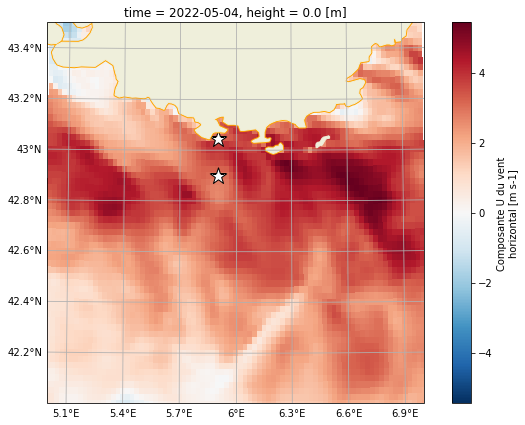

In [88]:
_ds = ds.isel(time=0)
fig, ax = plot_map(_ds.u10m)

ax.scatter(x=dsp.longitude, y=dsp.latitude, 
           s=300,
           facecolor="w",
           edgecolor="k",
           marker="*",
           transform=ccrs.PlateCarree())

### time series

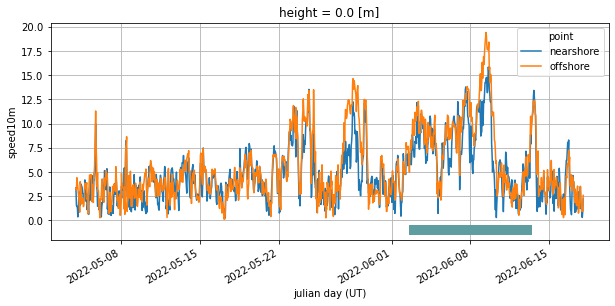

In [89]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
ax.plot([dinfo["start"], dinfo["end"]], [-1, -1], lw=10, color="cadetblue")
dsp.speed10m.plot.line(x="time")
ax.grid()

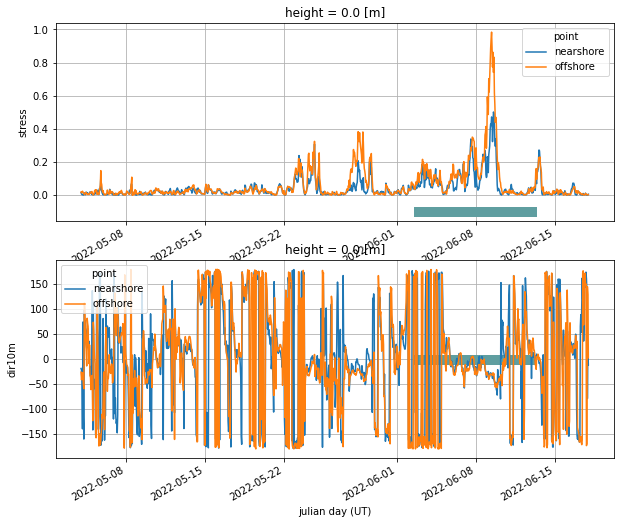

In [90]:
fig, axes = plt.subplots(2,1, figsize=(10,8))

ax = axes[0]
ax.plot([dinfo["start"], dinfo["end"]], [-.1, -.1], lw=10, color="cadetblue")
dsp.stress.plot.line(x="time", ax=ax)
ax.grid()

ax = axes[1]
ax.plot([dinfo["start"], dinfo["end"]], [-1, -1], lw=10, color="cadetblue")
dsp.dir10m.plot.line(x="time", ax=ax)
ax.grid()


Text(0.5, 1.0, 'wind stress')

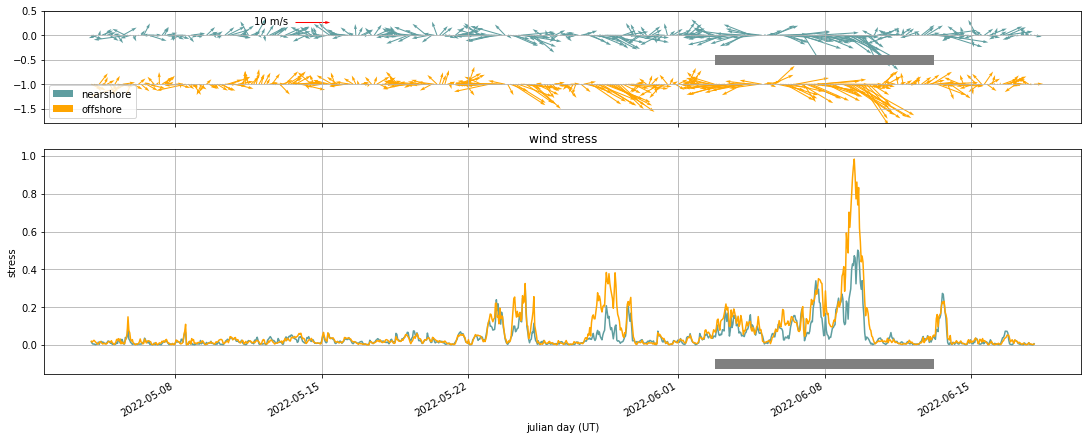

In [91]:
colors=["cadetblue", "orange"]

figsize=(15,6)

gs_kw = dict(height_ratios=[.5, 1])
fig, axd = plt.subplot_mosaic([['top'],['bottom']],
                              gridspec_kw=gs_kw, figsize=figsize,
                              constrained_layout=True, sharex=True)
# bathy
ax = axd["top"]
ax.plot([dinfo["start"], dinfo["end"]], -.5*np.ones(2), lw=10, color=".5")

di = 3
akwargs = dict(scale=3e2, width=1e-3)

off=0
for pt, c in zip(dsp.point.values, colors):
    _ds = dsp.sel(point=pt).isel(time=slice(0,None,di))
    ax.quiver(_ds.time,np.zeros(_ds.time.size)+off, _ds.u10m,  _ds.v10m, color=c, label=pt, **akwargs)
    off+=-1
ax.set_ylim(-1.8, .5)
ax.legend()
qk = ax.quiverkey(q, 0.25, 0.95, 10, '10 m/s', transform=ccrs.PlateCarree(), color="r",
                  labelpos='W', coordinates='axes', zorder=10)
ax.grid()

#

ax = axd["bottom"]
ax.plot([dinfo["start"], dinfo["end"]], [-.1, -.1], lw=10, color=".5")
for pt, c in zip(dsp.point.values, colors):
    dsp.sel(point=pt).stress.plot.line(x="time", ax=ax, color=c)
ax.grid()
ax.set_title("wind stress")


In [81]:
t = ds.time[0]

def map_wind(ds):

    fig, ax = plot_map(ds.stress, vmin=0, vmax=.4)

    ax.scatter(x=dsp.longitude, y=dsp.latitude, 
               s=300,
               facecolor="w",
               edgecolor="k",
               marker="*",
               transform=ccrs.PlateCarree())

    dsq = ds.isel(longitude=slice(0,None,4), latitude=slice(0,None,4))
    q = dsq.plot.quiver(x="longitude", y="latitude", u="u10m", v="v10m", scale=1e2,
                        color="w",
                        transform=ccrs.PlateCarree(), zorder=2)
    qk = ax.quiverkey(q, 0.25, 0.95, 10, '10 m/s', transform=ccrs.PlateCarree(), color="r",
                      labelpos='W', coordinates='axes', zorder=10)
    
    return fig

In [22]:
_start = dinfo["start"]-pd.Timedelta("1D")
_end = dinfo["end"]+pd.Timedelta("1D")

_ds = ds.sel(time=slice(_start, _end))

i=0
for t in tqdm(_ds.time):
    fig = map_wind(_ds.sel(time=t))
    figfile = os.path.join(f"/Users/aponte/tmp/figs/{i:03d}.png")
    fig.savefig(figfile, dpi=150, bbox_inches = "tight", facecolor='white', transparent=False)
    plt.close(fig)
    i+=1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 481/481 [04:44<00:00,  1.69it/s]


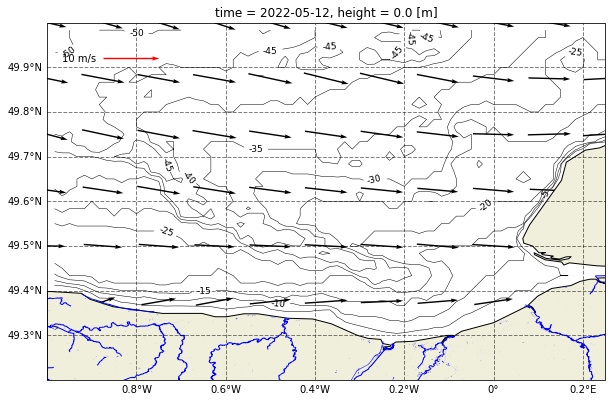

In [42]:
bounds=[-.5, -.1, 49.25, 49.5]
bounds=[-1., .25, 49.2, 50.]
fig, ax, crs = cp.plot_map(bounds=bounds, coast="bseine", land=None, rivers="bseine")

di=5
_ds = (ds.sel(time="2022-05-12 00:00:00")
       .isel(longitude=slice(0,None,di),latitude=slice(0,None,di))
      )

q = _ds.plot.quiver(x="longitude", y="latitude", u="u10m", v="v10m", scale=1e2, transform=crs, zorder=-2)
qk = ax.quiverkey(q, 0.1, 0.9, 10, '10 m/s', transform=crs, color="r",
                  labelpos='W', coordinates='axes', zorder=10)